In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
 from platform import python_version
 print(python_version())

3.7.6


In [13]:
pip install ctgan

Note: you may need to restart the kernel to use updated packages.


In [14]:
#Loading packages
%matplotlib inline 
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score 
import datetime as dt
from scipy import stats as sts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
import math
import seaborn as sns

In [15]:
#loading data
df=pd.read_excel("dataR2.xlsx")

In [16]:
#taking a look at the features of the real data 
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [17]:
#converting from excell format to csv
df.to_csv ("cancer_data.csv",  
                  index = None, 
                  header=True) 

In [18]:
#reading data as csv afeter covertion and re-labling it
data=pd.read_csv("cancer_data.csv")

In [19]:
#Taking a look at the distribution of our malignant and Benign counts
data.groupby("Classification").count()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
1,52,52,52,52,52,52,52,52,52
2,64,64,64,64,64,64,64,64,64


In [20]:
#Adding a booling colum that shows True if malignant and False if Benign
data['Bool_column'] = np.where(data['Classification']==2, 'True', 'False')

In [21]:
#Taking a look of our new data
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,Bool_column
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1,False
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1,False
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1,False
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1,False
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1,False
...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2,True
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2,True
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2,True
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2,True


In [22]:
#Droping the Classification column and saving it as new data so as to keep taht we maintain the older one with same features
new_data=data.drop(columns=['Classification'])

In [23]:
#reading the data
new_data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Bool_column
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,False
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,False
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,False
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,False
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,False
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,True
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,True
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,True
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,True


In [24]:
#loading conditional Tabular Generative adversarial network 
from ctgan import CTGANSynthesizer

In [25]:
discrete_columns = ["Bool_column"]

In [26]:
ctgan = CTGANSynthesizer(epochs=7200)

In [27]:
ctgan.fit(new_data, discrete_columns)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will re

In [28]:
# Synthetic copy
samples = ctgan.sample(10000)

In [29]:
samples

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Bool_column
0,56,31.519912,82,30.681856,5.646277,15.301020,3.546263,10.792905,925.192490,True
1,71,25.900390,96,4.528866,0.358342,69.485772,5.953051,3.058991,252.754336,False
2,67,29.256146,93,7.365615,1.581938,30.757659,3.139502,12.600832,147.106344,False
3,74,26.225287,93,6.259579,1.292596,13.472995,6.854703,6.752473,659.885095,False
4,60,25.668185,94,5.463385,1.691716,21.901940,6.070888,9.789538,340.391482,False
...,...,...,...,...,...,...,...,...,...,...
9995,60,23.527015,81,3.542214,1.530591,54.107581,9.754542,6.056051,214.599664,False
9996,37,23.440263,92,1.877723,0.679062,12.862044,19.464675,6.373697,362.143129,True
9997,49,29.597572,87,6.168049,0.864281,27.656613,6.212231,12.196700,265.354740,False
9998,69,31.804077,91,2.666725,0.736387,32.931766,5.879459,9.831813,401.816826,False


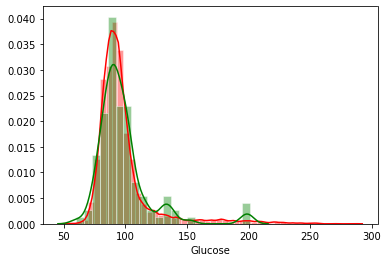

In [30]:
sns.distplot(a=samples.Glucose, color='r',  
            hist_kws={"edgecolor": 'white'}) 
sns.distplot(a=data.Glucose, color='g',  
             hist_kws={"edgecolor": 'white'}) 

  
# visualizing plot using matplotlib.pyplot library 
plt.show() 

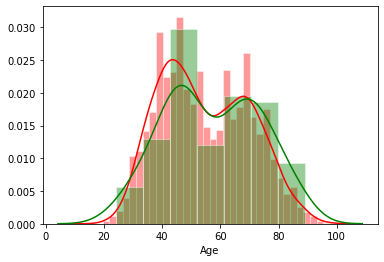

In [31]:
sns.distplot(a=samples.Age, color='r',  
             hist_kws={"edgecolor": 'white'}) 
sns.distplot(a=data.Age, color='g',  
             hist_kws={"edgecolor": 'white'}) 
  
# visualizing plot using matplotlib.pyplot library 
plt.show() 

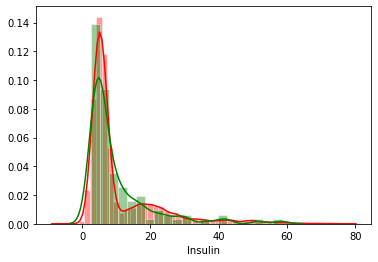

In [32]:
sns.distplot(a=samples.Insulin, color='r',  
             hist_kws={"edgecolor": 'white'}) 
sns.distplot(a=data.Insulin, color='g',  
             hist_kws={"edgecolor": 'white'}) 
  
# visualizing plot using matplotlib.pyplot library 
plt.show() 

In [33]:
samples['Classification'] = np.where(samples['Bool_column']== 'True', 1, 0)

In [34]:
samples

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Bool_column,Classification
0,56,31.519912,82,30.681856,5.646277,15.301020,3.546263,10.792905,925.192490,True,1
1,71,25.900390,96,4.528866,0.358342,69.485772,5.953051,3.058991,252.754336,False,0
2,67,29.256146,93,7.365615,1.581938,30.757659,3.139502,12.600832,147.106344,False,0
3,74,26.225287,93,6.259579,1.292596,13.472995,6.854703,6.752473,659.885095,False,0
4,60,25.668185,94,5.463385,1.691716,21.901940,6.070888,9.789538,340.391482,False,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,60,23.527015,81,3.542214,1.530591,54.107581,9.754542,6.056051,214.599664,False,0
9996,37,23.440263,92,1.877723,0.679062,12.862044,19.464675,6.373697,362.143129,True,1
9997,49,29.597572,87,6.168049,0.864281,27.656613,6.212231,12.196700,265.354740,False,0
9998,69,31.804077,91,2.666725,0.736387,32.931766,5.879459,9.831813,401.816826,False,0


In [35]:
cancer_data_2=samples.drop(columns=['Bool_column'])

In [36]:
#pip install maxentropy

<Figure size 720x720 with 0 Axes>

(10.0, 0.0)

<Figure size 720x720 with 0 Axes>

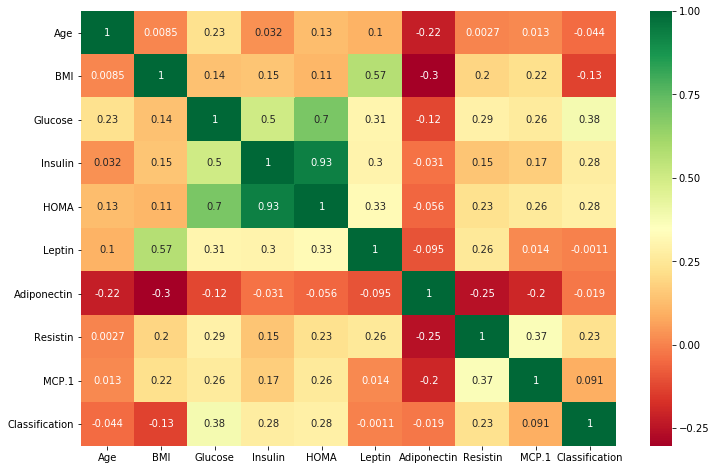

In [37]:
#get correlations of each features in dataset
corrmat = cancer_data_2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
f,ax= plt.subplots(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

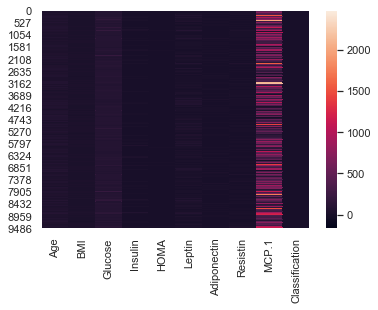

In [38]:
sns.set()
ax = sns.heatmap(cancer_data_2)

In [39]:
cancer_data_2.groupby("Classification").count()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
0,5023,5023,5023,5023,5023,5023,5023,5023,5023
1,4977,4977,4977,4977,4977,4977,4977,4977,4977


In [40]:
#the X variable will take everything expect theClassification, as x is the input and is supposed to match to the correct label
X =cancer_data_2.drop(columns = ["Classification"])
y = cancer_data_2['Classification']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
''' #Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)  '''

' #Feature Scaling\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)  '

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

RandomForestClassifier()

Average accuracy of holdout approach:  0.8039999999999999
Mean Time taken by holdout approach:  1.5376062870025635
-------------------


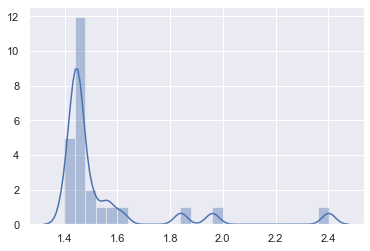

In [43]:
#Random forest using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=30,stratify=y)
randomforest_split = RandomForestClassifier()

time_holdout = []
score = []
for i in range(25):
  #time.time() is used to calculate the time taken for the model to run
  start_holdout = time.time()
  #trains the random forest using cross validation
  randomforest_split.fit(X = X_train, y = y_train)
  score.append(randomforest_split.score(X_test, y_test))
  
  end_holdout = time.time()
  time_holdout.append(end_holdout - start_holdout)
    
print("Average accuracy of holdout approach: ",np.mean(score))
print('Mean Time taken by holdout approach: ' ,np.mean(time_holdout))
print('-------------------')
sns.distplot(time_holdout)
plt.show()

Average accuracy of cross validation approach:  0.7997
Mean Time taken by cross validation approach:  17.780440731048586
-------------------


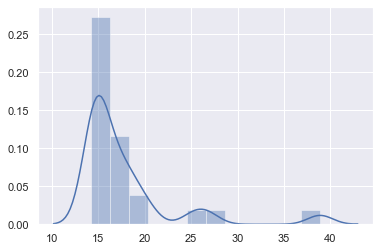

In [44]:
from sklearn.metrics import average_precision_score
randomforest = RandomForestClassifier()

time_cv = []
for i in range(25):
  #time.time() is used to calculate the time taken for the model to run
  start_cv = time.time()
  #trains the random forest using cross validation
  cv_score = cross_val_score(randomforest, X, y, cv=8)
  end_cv = time.time()
  time_cv.append(end_cv - start_cv)

print("Average accuracy of cross validation approach: ",np.mean(cv_score))
print('Mean Time taken by cross validation approach: ' ,np.mean(time_cv))
print('-------------------')
sns.distplot(time_cv)
plt.show()

In [45]:
randomforest_split = RandomForestClassifier()
preds =randomforest_split .fit(X_train,y_train).predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print("The accuracy of the model is %.3f" %accuracy_score(y_test, preds)) 
print("The recall of the model  is %.3f" % recall_score(y_test, preds))
print("The precision of the model is  is %.3f" % precision_score(y_test, preds))

The accuracy of the model is 0.802
The recall of the model  is 0.780
The precision of the model is  is 0.814


RandomForestClassifier()

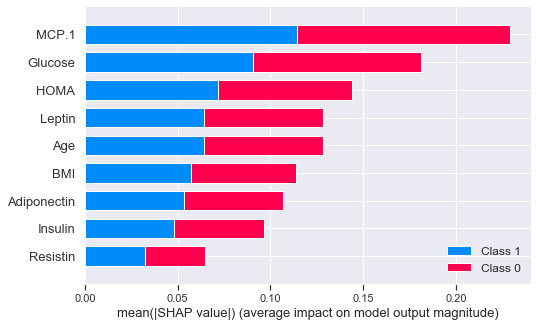

In [47]:
import shap
randomforest= RandomForestClassifier()
randomforest.fit(X = X_train, y = y_train)
explainer = shap.TreeExplainer(randomforest)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

In [48]:
Y_pred = randomforest.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

In [54]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)


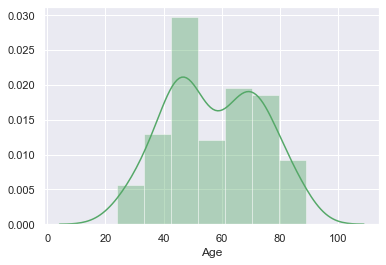

In [62]:
sns.distplot(data.Age,color='g',  
             hist_kws={"edgecolor": 'white'})

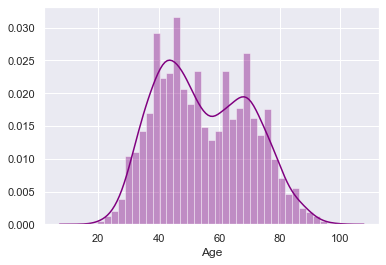

In [67]:
sns.distplot(cancer_data_2.Age,color='purple',hist_kws={"edgecolor": 'white'})

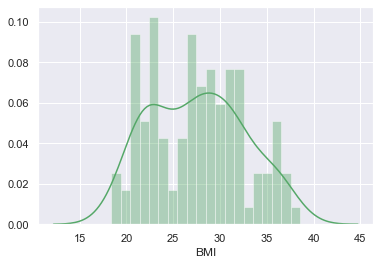

In [72]:
sns.distplot(data.BMI,color='g',  
             hist_kws={"edgecolor": 'white'},bins=20)

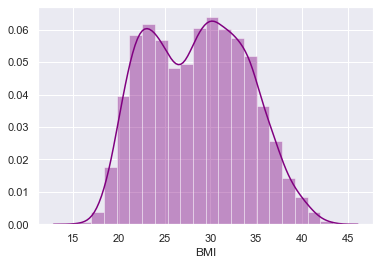

In [73]:
sns.distplot(cancer_data_2.BMI,color='purple',hist_kws={"edgecolor": 'white'},bins=20)

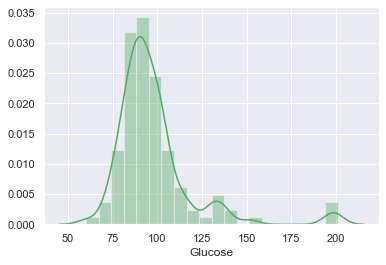

In [74]:
sns.distplot(data.Glucose	,color='g',  
             hist_kws={"edgecolor": 'white'},bins=20)

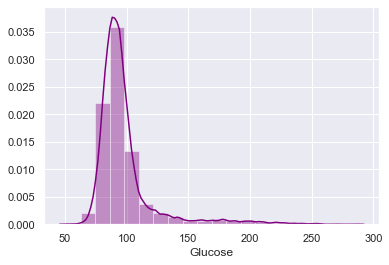

In [75]:
sns.distplot(cancer_data_2.Glucose	,color='purple',hist_kws={"edgecolor": 'white'},bins=20)

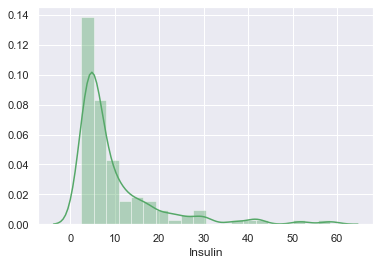

In [76]:
sns.distplot(data.Insulin,color='g',  
             hist_kws={"edgecolor": 'white'},bins=20)

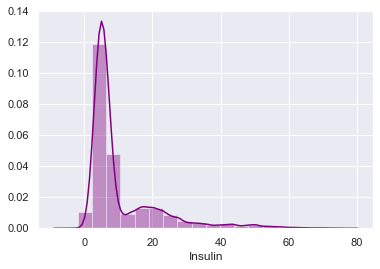

In [77]:
sns.distplot(cancer_data_2.Insulin,color='purple',hist_kws={"edgecolor": 'white'},bins=20)

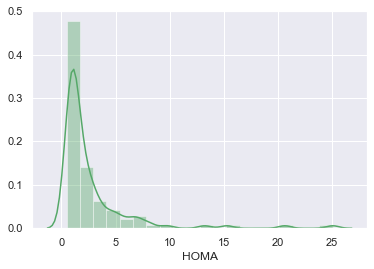

In [78]:
sns.distplot(data.HOMA,color='g',  
             hist_kws={"edgecolor": 'white'},bins=20)

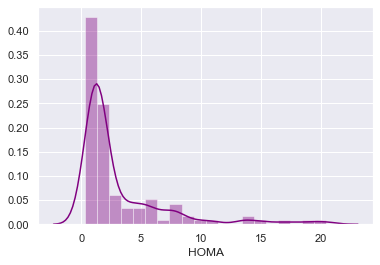

In [80]:
sns.distplot(cancer_data_2.HOMA[:116],color='purple',hist_kws={"edgecolor": 'white'},bins=20)

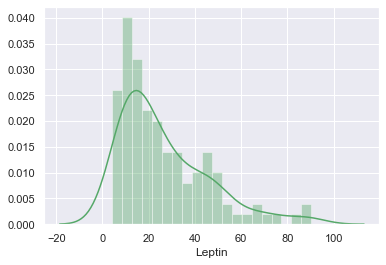

In [81]:
sns.distplot(data.Leptin,color='g',  
             hist_kws={"edgecolor": 'white'},bins=20)

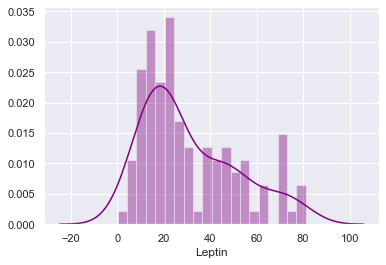

In [89]:
sns.distplot(cancer_data_2.Leptin[:116],color='purple',hist_kws={"edgecolor": 'white'},bins=20)

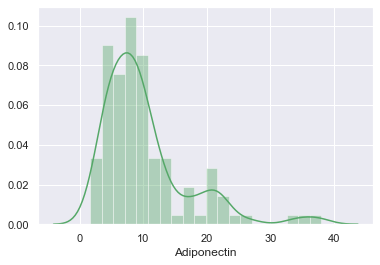

In [90]:
sns.distplot(data.Adiponectin,color='g',  
             hist_kws={"edgecolor": 'white'},bins=20)

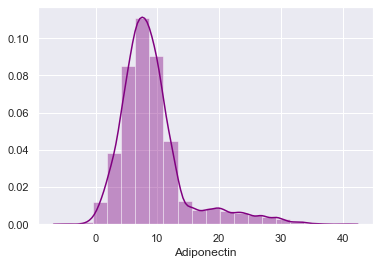

In [92]:
sns.distplot(cancer_data_2.Adiponectin,color='purple',hist_kws={"edgecolor": 'white'},bins=20)

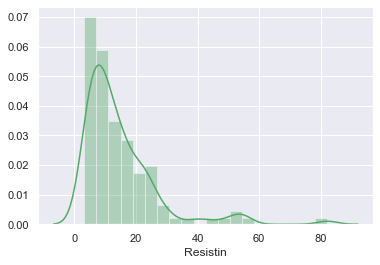

In [93]:
sns.distplot(data.Resistin,color='g',  
             hist_kws={"edgecolor": 'white'},bins=20)

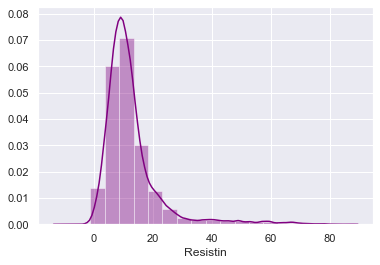

In [97]:
sns.distplot(cancer_data_2.Resistin,color='purple',hist_kws={"edgecolor": 'white'},bins=20)

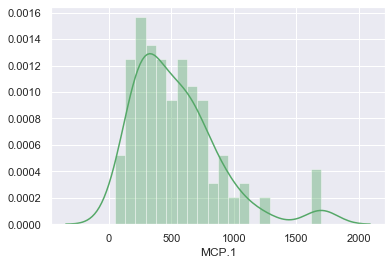

In [99]:
sns.distplot(data["MCP.1"],color='g',  
             hist_kws={"edgecolor": 'white'},bins=20)

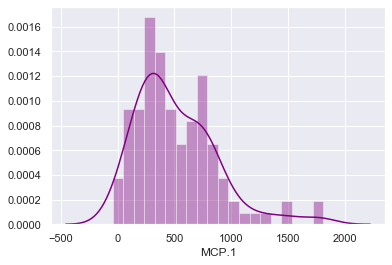

In [104]:
sns.distplot(cancer_data_2["MCP.1"][:116],color='purple',hist_kws={"edgecolor": 'white'},bins=20)

In [ ]:
from statsmodels.discrete.discrete_model import Probit

In [ ]:
import statsmodels.api as sm

In [ ]:
Y = cancer_data_2["Classification"]
X = cancer_data_2.drop(["Classification"], 1)
X = sm.add_constant(X)
model = Probit(Y, X.astype(float))
probit_model = model.fit()
print(probit_model.summary())

In [ ]:
sns.pairplot(cancer_data_2, hue='Classification', size=2.5)

In [ ]:
data['Classification'] = np.where(data['Classification']== 1, 0, 1)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

In [ ]:
cancer=np.array(cancer_data_2)


In [ ]:
skf = StratifiedKFold(n_splits=9)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(cancer_data_2.BMI, cancer_data_2.Classification)))


X_train = cancer_data_2[train_index]
y_train = cancer_data_2[train_index]
X_test = cancer_data_2[test_index]
y_test = cancer_data_2[test_index]

In [ ]:
data

In [ ]:
data=data.drop(columns=["Bool_column"])

In [ ]:
Y = data["Classification"]
X = data.drop(["Classification"], 1)
X = sm.add_constant(X)
model = Probit(Y, X.astype(float))
probit_model = model.fit()
print(probit_model.summary())